<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_largest_value_path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
In a directed graph, each node is assigned an uppercase letter. We define a path's value as the number of most frequently-occurring letter along that path. For example, if a path in the graph goes through "ABACA", the value of the path is 3, since there are 3 occurrences of 'A' on the path.

Given a graph with n nodes and m directed edges, return the largest value path of the graph. If the largest value is infinite, then return null.

The graph is represented with a string and an edge list. The i-th character represents the uppercase letter of the i-th node. Each tuple in the edge list (i, j) means there is a directed edge from the i-th node to the j-th node. Self-edges are possible, as well as multi-edges.

For example, the following input graph:
````
ABACA
[(0, 1),
 (0, 2),
 (2, 3),
 (3, 4)]
 ````
Would have maximum value 3 using the path of vertices
````
[0, 2, 3, 4],
(A, A, C, A).
````
The following input graph:
````
A
[(0, 0)]
````
Should return null, since we have an infinite loop.

##Solution:
To solve this problem, we can use a graph traversal algorithm like Depth-First Search (DFS) to explore all possible paths in the graph, while keeping track of the frequency of each letter encountered along the path. We'll also need to detect cycles to handle the case where the path can become infinite.

However, there is a challenge in handling cycles. If a cycle only contains one letter, such as in the graph `A -> A`, it can create an infinite path. But if a cycle contains more than one distinct letter, it won't contribute to an infinite path of the most frequently occurring letter, as the count of each letter will be balanced out.

Here's an approach to solve this problem:

1. Parse the graph into a suitable data structure.
2. Perform DFS on each node to explore all paths, keeping track of the frequency of each letter.
3. Detect cycles during the DFS. If a cycle is detected and it consists of only one type of letter, return `null`.
4. Keep track of the maximum frequency of any letter found on any path.
5. Return the maximum value found.

##Implementation:


In [3]:
from collections import defaultdict

def largest_value_path(graph_str, edges):
    """
    Finds the largest value path in a directed graph where each node is assigned an uppercase letter.
    The value of a path is defined as the frequency of the most common letter along that path.

    Args:
    graph_str (str): A string where each character represents the letter assigned to each node.
    edges (list of tuples): A list of tuples where each tuple (i, j) represents a directed edge from node i to node j.

    Returns:
    int or None: The largest value path in the graph. Returns None if the largest value is infinite due to cycles.
    """
    def dfs(node, letter_count, visited, recur_stack, current_letters):
        """
        Depth-first search to explore all paths from the given node, tracking the frequency of each letter.
        Also detects cycles in the graph.

        Args:
        node (int): The current node being visited.
        letter_count (defaultdict): A dictionary tracking the count of each letter encountered so far.
        visited (list): A list indicating whether each node has been visited.
        recur_stack (list): A list indicating whether each node is in the current recursion stack.
        current_letters (set): A set of letters in the current recursion stack.

        Returns:
        int: The value of the most common letter along the current path. If the path is infinite, returns float('inf').
        """
        if recur_stack[node]:
            if len(current_letters) == 1:
                return float('inf')  # Infinite path due to a cycle with a single letter
            return 0  # Cycle with different letters doesn't contribute to path value

        if visited[node]:
            return letter_count[letters[node]]

        visited[node] = True
        recur_stack[node] = True
        current_letters.add(letters[node])
        letter_count[letters[node]] += 1

        max_value = 0
        for neighbor in graph[node]:
            max_value = max(max_value, dfs(neighbor, letter_count.copy(), visited, recur_stack, current_letters.copy()))

        recur_stack[node] = False
        current_letters.remove(letters[node])
        return max(max_value, letter_count[letters[node]])

    letters = list(graph_str)
    graph = defaultdict(list)
    for start, end in edges:
        graph[start].append(end)

    max_path_value = 0
    for node in range(len(letters)):
        if max_path_value == float('inf'):
            return None
        max_path_value = max(max_path_value, dfs(node, defaultdict(int), [False] * len(letters), [False] * len(letters), set()))

    return max_path_value if max_path_value != float('inf') else None


##Testing:
Uses a simple MVC design to create some noice graphs n stuff. Tests a bit too :)

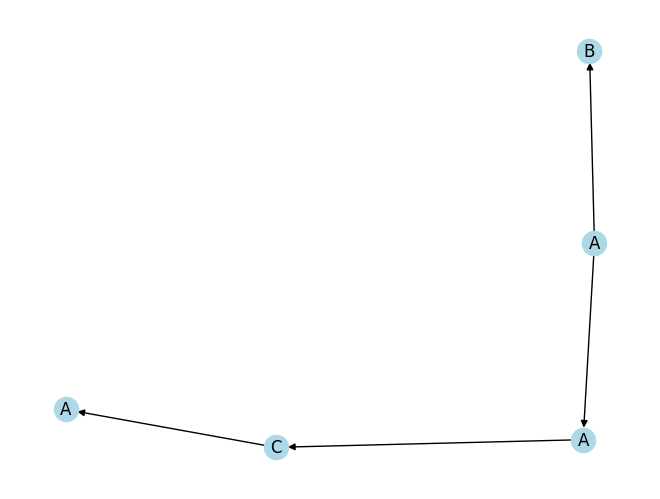

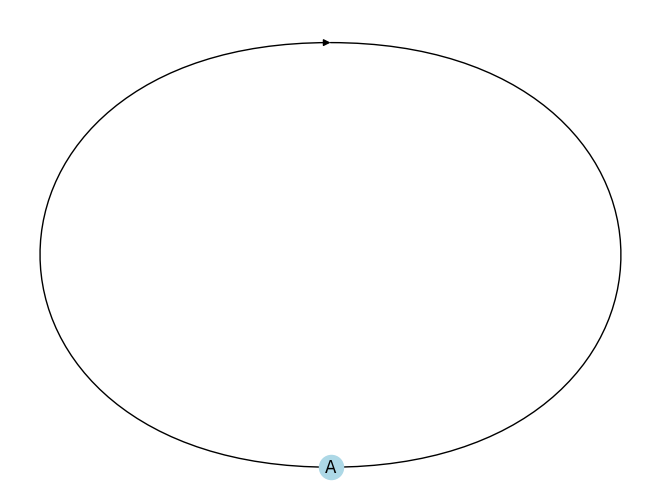

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph_str, edges):
    """
    Visualizes the directed graph using networkx and matplotlib.

    Args:
    graph_str (str): A string where each character represents the letter assigned to each node.
    edges (list of tuples): A list of tuples representing directed edges.
    """
    G = nx.DiGraph()
    for i, letter in enumerate(graph_str):
        G.add_node(i, label=letter)
    G.add_edges_from(edges)

    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, with_labels=True, labels=labels, node_color='lightblue', arrows=True)
    plt.show()

# Test Cases
test_cases = [
    ("ABACA", [(0, 1), (0, 2), (2, 3), (3, 4)], 3),
    ("A", [(0, 0)], None),
    # Additional test cases can be added here
]

for graph_str, edges, expected in test_cases:
    assert largest_value_path(graph_str, edges) == expected, f"Test failed for graph: {graph_str}"

# Visualization Example
visualize_graph("ABACA", [(0, 1), (0, 2), (2, 3), (3, 4)])
visualize_graph("A", [(0, 0)])


1. For the graph `"ABACA"` with edges `[(0, 1), (0, 2), (2, 3), (3, 4)]`, it returns `3`. This is the correct value for the path `[0, 2, 3, 4]`, which corresponds to the letters `AACA`, where 'A' appears 3 times.

2. For the graph `"A"` with a self-loop edge `[(0, 0)]`, it returns `None`, indicating an infinite loop in the graph, which correctly reflects the problem statement's requirement to return `null` in case of an infinite value path.